In [3]:
!pip install -r ../requirements.txt

  Using cached SQLAlchemy-1.4.37-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 126.5 MB/s eta 0:00:0000:0100:01
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached psycopg2_binary-2.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached ipyleaflet-0.17.0-py2.py3-none-any.whl (3.3 MB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached seaborn-0.11.2-py3

In [4]:
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Exporting ------------------------------------------------------------
import pickle

In [5]:
# Step 1. Read the dataset
# The data this week comes from Coffee Quality Database courtesy of Buzzfeed Data Scientist 
# James LeDoux. The original data can be found on James' github. The data was re-posted to Kaggle.
# These data were collected from the Coffee Quality Institute's review pages in January 2018.
# There is data for both Arabica and Robusta beans, across many countries and professionally 
# rated on a 0-100 scale. All sorts of scoring/ratings for things like acidity, sweetness, fragrance, 
# balance, etc - may be useful for either separating into visualizations/categories or for 
# modeling/recommenders.
# https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md
url = 'https://raw.githubusercontent.com/rfordatascience/' + \
'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('../data/raw/coffee.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [6]:
# Get a sample
df_raw.sample(10)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
780,82.08,Arabica,ipanema coffees,Brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,...,Green,1,"October 7th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,1.00,1.00,1.00
666,82.50,Arabica,saul m. hernandez ramirez,Mexico,la pagua,NaN,el mavodo,1702773555,NaN,1679,...,None,10,"September 27th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1679.00,1679.00,1679.00
1109,80.17,Arabica,pablo enrique martinez gama,Mexico,"la orduña, coatepec, veracruz",NaN,alcafe s.a. de c.v,1104362940,café katsina,1250,...,Green,2,"October 9th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1250.00,1250.00,1250.00
247,84.00,Arabica,olam agro colombia,Colombia,NaN,NaN,trilladora asia,1032,olam international ltd,1480,...,Green,0,"May 27th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1480.00,1480.00,1480.00
469,83.17,Arabica,exportadora de cafe condor s.a,Colombia,NaN,NaN,trilladora bonanza - armenia quindioa,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Blue-Green,0,"June 8th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.00,1750.00,1750.00
1168,79.58,Arabica,carl walker,Guatemala,la igualdad,NaN,concepcion,11-194-0008,NaN,3500 - 5200 feet,...,NaN,19,"January 13th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1066.80,1584.96,1325.88
497,83.00,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,007/16A,dry mill,002/1660/0105,ipanema coffees,894,...,Green,5,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,894.00,894.00,894.00
989,81.08,Arabica,wali ali,United States,NaN,NaN,juanana coffee association,NaN,conscious bean coffee,5600 feet,...,NaN,0,"March 3rd, 2016",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1706.88,1706.88,1706.88
671,82.50,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0582,c.i.racafe & cia s.c.a,de 1.600 a 1.950 msnm,...,Green,3,"March 5th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.00,1950.00,1775.00
40,86.17,Arabica,itdp international,Thailand,co-op #12,NaN,NaN,01-011-512,lanna cafe,1300,...,Green,9,"April 12th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1300.00,1300.00,1300.00


In [7]:
# Select metrics
df_interim = df_raw.copy()
df_interim = df_interim[['total_cup_points',
                            'species',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters',
                            'moisture']] #criterio algunos datos son irrelevante para la predicción 
df_interim = df_interim.dropna()

In [8]:
# Get a sample
df_interim.sample(10)

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
39,86.17,Arabica,United States,Other,7.67,8.00,8.00,8.17,8.08,10.00,1941.000,0.00
583,82.75,Arabica,Indonesia,Sulawesi,7.50,7.42,7.58,7.58,7.50,10.00,1500.000,0.12
198,84.25,Arabica,Colombia,Caturra,7.83,7.75,7.58,7.92,7.75,10.00,1775.000,0.12
1065,80.58,Arabica,Guatemala,Bourbon,7.17,6.83,7.50,7.17,7.25,10.00,1383.792,0.11
200,84.25,Arabica,Colombia,Caturra,7.42,7.83,7.75,7.92,7.83,10.00,442.000,0.12
1094,80.25,Arabica,Brazil,Catuai,7.17,7.42,7.08,7.00,7.00,10.00,995.000,0.11
23,87.08,Arabica,United States,Other,8.25,8.17,8.17,7.83,8.17,10.00,2112.000,0.00
818,81.92,Arabica,Brazil,Catuai,7.42,7.33,7.50,7.50,7.33,10.00,1020.000,0.11
928,81.50,Arabica,Mexico,Typica,7.50,7.25,7.50,7.42,7.58,10.00,1100.000,0.11
329,83.67,Arabica,Guatemala,Caturra,8.17,7.83,7.67,8.08,7.75,9.33,1450.000,0.11


In [11]:
# Transform

df_interim['species'] = pd.Categorical(df_interim['species'])
df_interim['country_of_origin'] = pd.Categorical(df_interim['country_of_origin'])
df_interim['variety'] = pd.Categorical(df_interim['variety'])

In [12]:
# We'll divide our cup point into two classes: specialty or not
# All coffees with over 80 points are considered specialty, we'll use the median as separator
# https://nobletreecoffee.com/coffee-cupping/
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')

In [15]:
# Save to final dataset
df_interim.to_csv('../data/interim/coffee.csv')
df = df_interim.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    object  
dtypes: category(3), float64(9), object(1)
memory usage: 91.3+ KB


In [20]:
# Proceed to train test split
X = df.drop(['total_cup_points', 'specialty'], axis=1)
y = df['specialty']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, stratify=y)
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
780,Arabica,Brazil,Yellow Bourbon,7.25,7.58,7.58,7.25,7.92,10.0,1.0,0.00,No
1293,Arabica,Honduras,Pacas,7.00,6.83,7.17,7.00,7.17,8.0,1350.0,0.11,No
1223,Arabica,Mexico,Caturra,7.25,7.00,6.83,7.58,7.08,10.0,1200.0,0.13,No
157,Arabica,Brazil,Catuai,8.50,7.50,7.75,7.50,7.83,10.0,1100.0,0.11,Yes
520,Arabica,Mexico,Bourbon,7.50,7.50,7.50,7.58,7.58,10.0,1200.0,0.11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
428,Arabica,Colombia,Caturra,7.83,7.67,7.33,7.67,7.67,10.0,1750.0,0.11,Yes
236,Arabica,Guatemala,Bourbon,7.58,7.67,8.00,7.75,7.67,10.0,1550.0,0.10,Yes
129,Arabica,Guatemala,Bourbon,7.75,7.58,8.00,7.92,7.75,10.0,1600.0,0.10,Yes
145,Arabica,Colombia,Other,7.83,7.58,7.92,7.67,7.83,10.0,1500.0,0.00,Yes


In [21]:
# Sample
X.sample(10)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
128,Arabica,Costa Rica,Catuai,8.08,7.67,7.83,7.50,7.92,10.0,1150.0,0.10
1127,Arabica,Mexico,Typica,7.25,7.08,7.17,7.33,7.33,10.0,1250.0,0.12
888,Arabica,Guatemala,Bourbon,7.50,7.33,7.33,7.33,7.33,10.0,1752.6,0.11
298,Arabica,Taiwan,Typica,7.67,7.58,7.58,7.67,7.83,10.0,750.0,0.00
740,Arabica,Malawi,Gesha,7.58,7.33,7.42,7.58,7.50,10.0,1180.0,0.13
661,Arabica,Mexico,Other,7.42,7.50,7.67,7.25,7.50,10.0,1600.0,0.00
1099,Arabica,Nicaragua,Caturra,7.08,7.00,7.25,7.50,7.25,10.0,900.0,0.11
543,Arabica,Brazil,Moka Peaberry,7.08,7.50,7.83,7.75,7.67,10.0,11000.0,0.11
1063,Arabica,Brazil,Bourbon,7.42,7.33,7.00,7.08,7.25,10.0,1200.0,0.00
1034,Arabica,Mexico,Bourbon,7.50,7.33,7.25,7.17,7.17,10.0,100.0,0.13


In [24]:
# Get basic statistics
X_train.describe().T #sweetness, altitude_mean_meters no tienen poder predictivo

,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.565850,0.310261,5.08,7.42,7.58,7.75,8.75
aftertaste,747.0,7.386948,0.337051,6.17,7.17,7.42,7.58,8.50
acidity,747.0,7.525877,0.313565,5.25,7.33,7.50,7.67,8.58
body,747.0,7.509652,0.271466,6.42,7.33,7.50,7.67,8.42
balance,747.0,7.497617,0.341907,6.08,7.33,7.50,7.67,8.58
sweetness,747.0,9.913802,0.487428,1.33,10.00,10.00,10.00,10.00
altitude_mean_meters,747.0,1995.235849,10551.255592,1.00,1100.00,1317.00,1600.00,190164.00
moisture,747.0,0.094177,0.044333,0.00,0.10,0.11,0.12,0.17


In [28]:
X_train.describe(include='category') # species no tiene poder predictivo

,species,country_of_origin,variety
count,747,747,747
unique,2,31,26
top,Arabica,Mexico,Caturra
freq,745,173,180


In [30]:
X_train['species'].value_counts()

Arabica    745
Robusta      2
Name: species, dtype: int64

In [31]:
X_train['country_of_origin'].value_counts()

Mexico                          173
Guatemala                       101
Colombia                         99
Brazil                           77
Taiwan                           49
Honduras                         39
Costa Rica                       32
Tanzania, United Republic Of     24
Uganda                           19
Kenya                            18
China                            14
El Salvador                      14
Indonesia                        13
Nicaragua                        13
Ethiopia                         11
Malawi                            9
Myanmar                           7
Thailand                          4
Haiti                             4
United States                     4
Vietnam                           4
Laos                              3
Panama                            3
United States (Puerto Rico)       3
Peru                              2
Philippines                       2
India                             2
Burundi                     

In [32]:
X_train['country_of_origin'].value_counts(normalize=True)

Mexico                          0.231593
Guatemala                       0.135207
Colombia                        0.132530
Brazil                          0.103079
Taiwan                          0.065596
Honduras                        0.052209
Costa Rica                      0.042838
Tanzania, United Republic Of    0.032129
Uganda                          0.025435
Kenya                           0.024096
China                           0.018742
El Salvador                     0.018742
Indonesia                       0.017403
Nicaragua                       0.017403
Ethiopia                        0.014726
Malawi                          0.012048
Myanmar                         0.009371
Thailand                        0.005355
Haiti                           0.005355
United States                   0.005355
Vietnam                         0.005355
Laos                            0.004016
Panama                          0.004016
United States (Puerto Rico)     0.004016
Peru            

In [33]:
X_train['variety'].value_counts()

Caturra                  180
Typica                   152
Bourbon                  149
Other                     81
Catuai                    53
Yellow Bourbon            23
Mundo Novo                20
Catimor                   17
SL14                      12
Pacas                     10
Gesha                     10
SL28                      10
SL34                       8
Pacamara                   7
Java                       2
Mandheling                 2
Sumatra                    2
Ruiru 11                   1
Sulawesi                   1
Ethiopian Heirlooms        1
Peaberry                   1
Ethiopian Yirgacheffe      1
Blue Mountain              1
Moka Peaberry              1
Marigojipe                 1
Sumatra Lintong            1
Pache Comun                0
Arusha                     0
Name: variety, dtype: int64

In [34]:
X_train['variety'].value_counts(normalize=True)

Caturra                  0.240964
Typica                   0.203481
Bourbon                  0.199465
Other                    0.108434
Catuai                   0.070950
Yellow Bourbon           0.030790
Mundo Novo               0.026774
Catimor                  0.022758
SL14                     0.016064
Pacas                    0.013387
Gesha                    0.013387
SL28                     0.013387
SL34                     0.010710
Pacamara                 0.009371
Java                     0.002677
Mandheling               0.002677
Sumatra                  0.002677
Ruiru 11                 0.001339
Sulawesi                 0.001339
Ethiopian Heirlooms      0.001339
Peaberry                 0.001339
Ethiopian Yirgacheffe    0.001339
Blue Mountain            0.001339
Moka Peaberry            0.001339
Marigojipe               0.001339
Sumatra Lintong          0.001339
Pache Comun              0.000000
Arusha                   0.000000
Name: variety, dtype: float64

In [37]:
# Analyze
X_train.sort_values(by='altitude_mean_meters', ascending=False).head(20)


,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
896,Arabica,Guatemala,Bourbon,7.42,7.08,7.50,7.42,7.33,10.00,190164.0,0.12
1144,Arabica,Guatemala,Bourbon,7.50,7.25,7.58,7.33,7.42,9.33,190164.0,0.10
1040,Arabica,Nicaragua,Other,7.25,7.17,7.25,7.33,7.25,10.00,110000.0,0.12
543,Arabica,Brazil,Moka Peaberry,7.08,7.50,7.83,7.75,7.67,10.00,11000.0,0.11
840,Arabica,Myanmar,Catuai,7.33,7.50,7.42,7.33,7.33,10.00,4001.0,0.00
1123,Arabica,Myanmar,Other,7.17,7.00,7.42,7.17,7.00,10.00,3845.0,0.00
1038,Arabica,Myanmar,Catuai,6.92,7.00,7.58,7.50,7.08,10.00,3825.0,0.00
1073,Arabica,Myanmar,Other,7.17,7.17,7.42,7.25,7.08,10.00,3800.0,0.00
1269,Arabica,Indonesia,Other,7.33,6.50,6.08,7.58,6.33,9.33,3500.0,0.12
837,Arabica,Guatemala,Bourbon,7.58,7.33,7.42,7.58,7.25,10.00,3280.0,0.10


In [39]:
# Given the excess of categories in country and variety, we'll aggregate 
# low values into others (using Pareto's rule or a minimum of 50 observations)
top_varieties = ['Caturra', 'Typica', 'Bourbon', 'Catuai']
df_interim['variety'] = df_interim['variety'].apply(lambda x: x if x in top_varieties else 'Other')
top_country = ['Mexico', 'Guatemala', 'Colombia', 'Brazil', 'Taiwan']
df_interim['country_of_origin'] = df_interim['country_of_origin'].apply(lambda x: x if x in top_country else 'Other')
df_interim.variety = pd.Categorical(df_interim.variety)
df_interim.country_of_origin = pd.Categorical(df_interim.country_of_origin)
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')
df_interim.specialty = pd.Categorical(df_interim.specialty)

In [40]:
# Second interation after cleaning up variables
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    category
dtypes: category(4), float64(9)
memory usage: 82.4 KB


In [42]:
df = df_interim.copy()
df_interim.to_csv('../data/interim/coffee_modif.csv')

In [48]:
# Again, train and test
X = df.drop(["total_cup_points", "specialty", 'altitude_mean_meters', 'sweetness', 'species'], axis=1)
y = df["specialty"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)
df_train = pd.concat([X_train, y_train], axis=1)

In [49]:
# Get info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 780 to 911
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country_of_origin  747 non-null    category
 1   variety            747 non-null    category
 2   aroma              747 non-null    float64 
 3   aftertaste         747 non-null    float64 
 4   acidity            747 non-null    float64 
 5   body               747 non-null    float64 
 6   balance            747 non-null    float64 
 7   moisture           747 non-null    float64 
dtypes: category(2), float64(6)
memory usage: 42.7 KB


In [51]:
# Get stats
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.565850,0.310261,5.08,7.42,7.58,7.75,8.75
aftertaste,747.0,7.386948,0.337051,6.17,7.17,7.42,7.58,8.50
acidity,747.0,7.525877,0.313565,5.25,7.33,7.50,7.67,8.58
body,747.0,7.509652,0.271466,6.42,7.33,7.50,7.67,8.42
balance,747.0,7.497617,0.341907,6.08,7.33,7.50,7.67,8.58
moisture,747.0,0.094177,0.044333,0.00,0.10,0.11,0.12,0.17


In [52]:
# Describe categories
X_train.describe(include='category')

,country_of_origin,variety
count,747,747
unique,6,5
top,Other,Other
freq,248,213


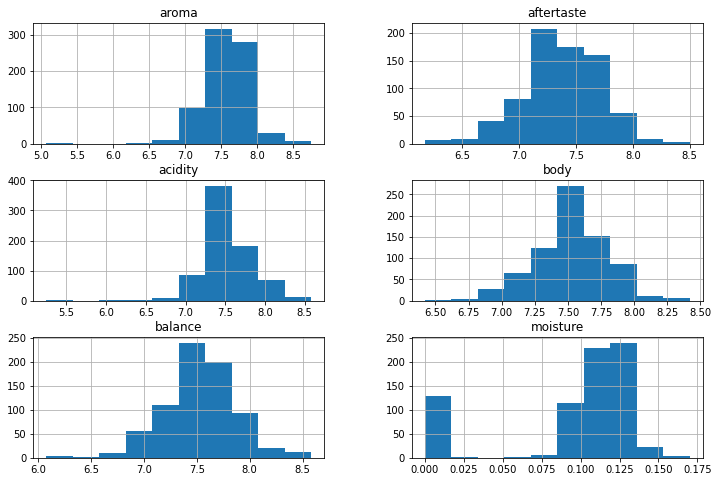

In [55]:
# Plot histograms
X_train.hist(figsize=(12,8))
plt.show()

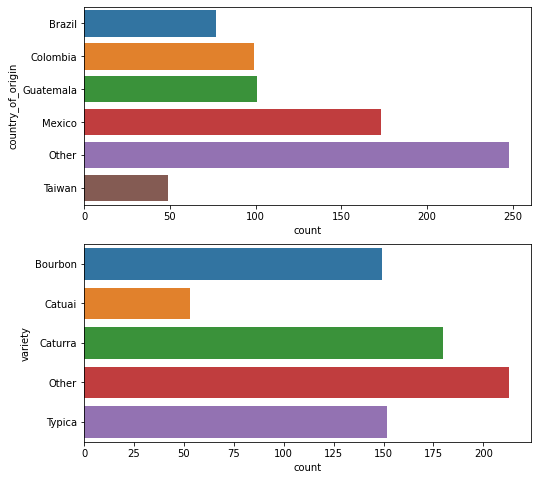

In [56]:
# Plot categories countplot
cats = X_train.select_dtypes('category')
fig, ax = plt.subplots(2,1, figsize=(8,8))
axs = ax.flatten()
for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax= axs[i])

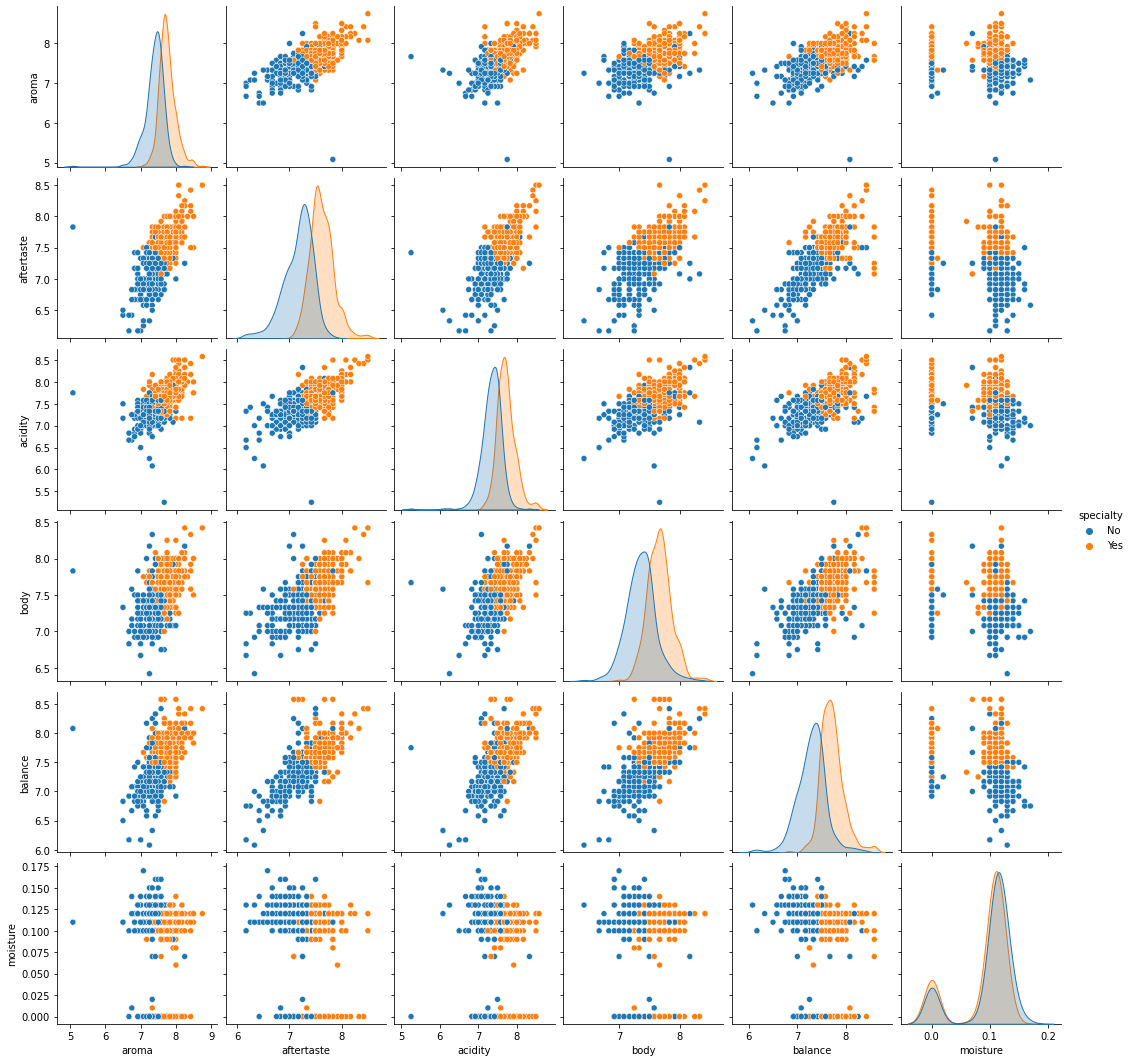

In [57]:
# Plot pairplot
sns.pairplot(data=df_train, hue= 'specialty')
plt.show()

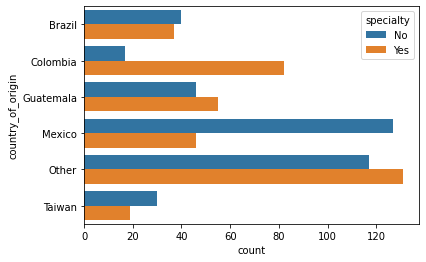

In [59]:
# Plot category effect
sns.countplot(data= df_train, y= 'country_of_origin', hue= 'specialty')
plt.show()

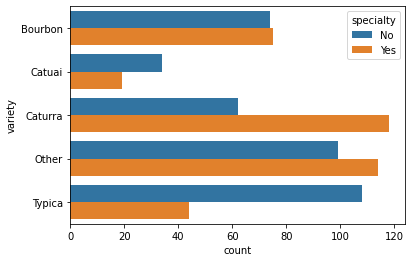

In [60]:
# Plot category effect
sns.countplot(data= df_train, y= 'variety', hue= 'specialty')
plt.show()

In [58]:
# Calculate correlation
X_train.corr().style.background_gradient(cmap= 'Blues')

,aroma,aftertaste,acidity,body,balance,moisture
aroma,1.000000,0.675971,0.586244,0.523622,0.588692,-0.038481
aftertaste,0.675971,1.000000,0.680573,0.668489,0.768697,-0.139767
acidity,0.586244,0.680573,1.000000,0.604851,0.638995,-0.084052
body,0.523622,0.668489,0.604851,1.000000,0.688455,-0.178684
balance,0.588692,0.768697,0.638995,0.688455,1.000000,-0.197440
moisture,-0.038481,-0.139767,-0.084052,-0.178684,-0.197440,1.000000


In [61]:
# 3.1 Create your pipeline processing
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/
cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

encode_data = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [62]:
# 3.2 Perform model fit
rforest = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
rforest.fit(X_train, y_train)
print(f'Accuracy: {rforest.score(X_train, y_train):.3f}')

Accuracy: 1.000


              precision    recall  f1-score   support

          No       0.95      0.91      0.93       126
         Yes       0.91      0.95      0.93       124

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



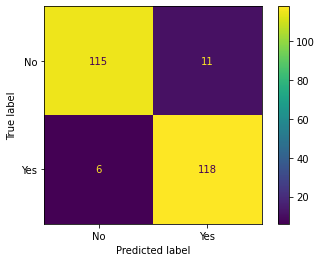

In [63]:
# 3.4 Calculate metrics on model
y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rforest.classes_).plot()
plt.show()

In [64]:
# Get variable importance
names = []
names.extend(num_cols)
cats_names = rforest.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names().tolist()
names.extend(cats_names)
imp = rforest.named_steps['classifier'].feature_importances_

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


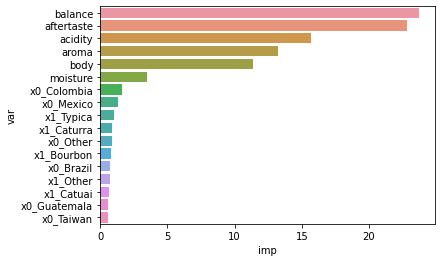

In [67]:
# Plot variable importance
var_imp = pd.DataFrame({'var': names, 'imp': imp * 100}).sort_values(by='imp', ascending=False)
sns.barplot(data=var_imp, x='imp', y= 'var')
plt.show()

In [69]:
# Save the model as a pickle
filename = '../models/coffee_model.pkl'
pickle.dump(rforest, open(filename,'wb'))

In [70]:
# Create a set for testing
example = ['Other', 'Other', 7.42, 7.33, 7.42, 7.25, 7.33, 0]
example_df = pd.DataFrame(np.array(example).reshape(1,8), columns= X_train.columns)

In [71]:
# Predcit based on the set
rforest.predict(example_df)

array(['No'], dtype=object)